In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [5]:
data = pd.read_csv('Heart_Disease .csv')

In [6]:
data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diseased
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   restbp    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  Diseased  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [13]:
for i in range(len(data['ca'])):
    if data['ca'][i]=='?':
        data['ca'][i]='1'

In [14]:
for i in range(len(data['thal'])):
    if data['thal'][i]=='?':
        data['thal'][i]='3'

In [15]:
data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diseased
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [16]:
X = data.drop(columns=['Diseased']) 
y = data['Diseased']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
dt_model=DecisionTreeClassifier(criterion='gini',random_state=42)

In [19]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred_dt = dt_model.predict(X_test)

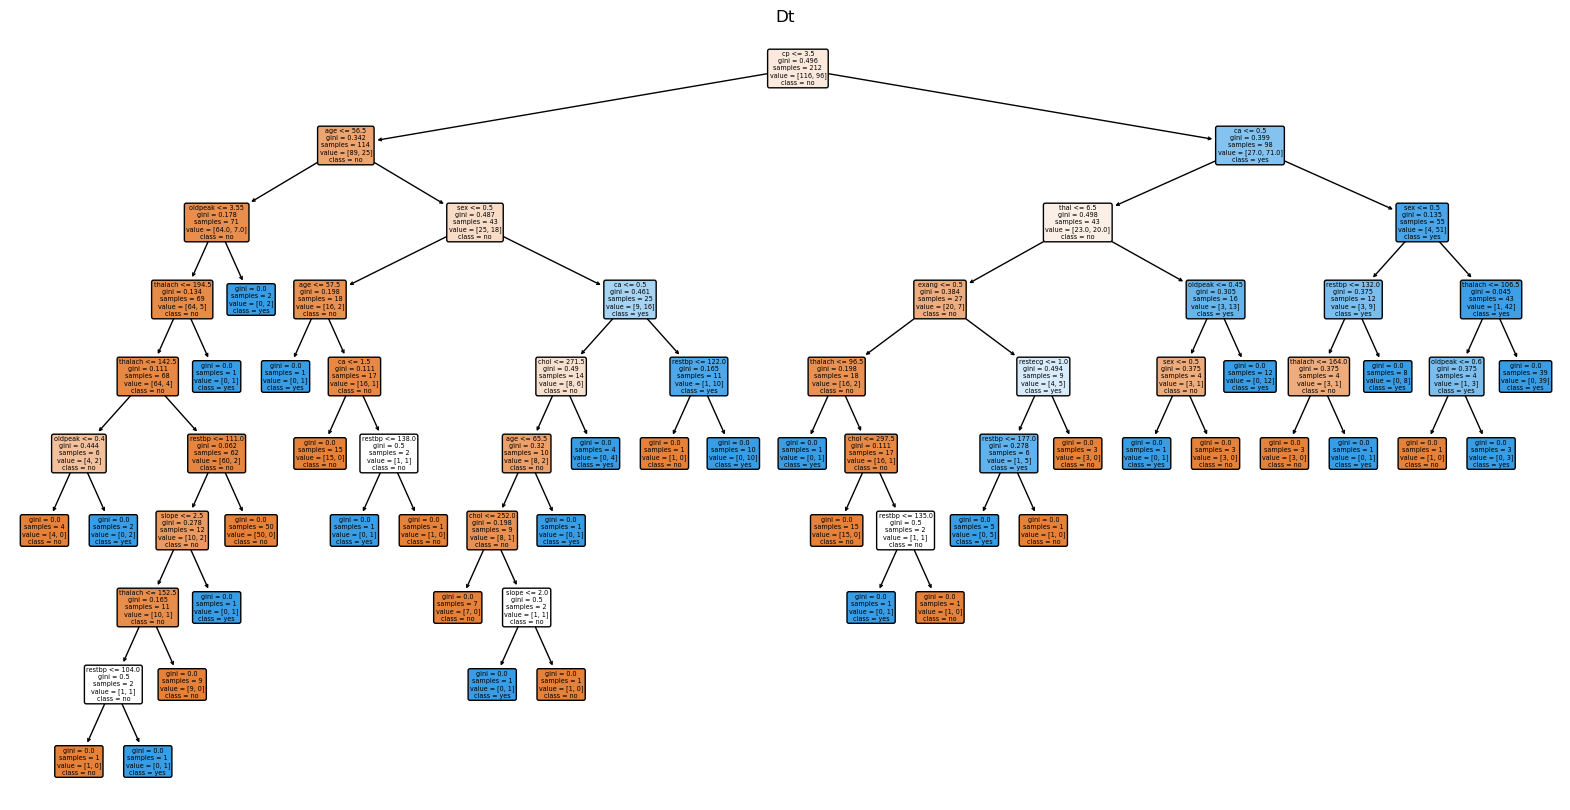

In [22]:
plt.figure(figsize=(20,10))
plot_tree(dt_model,filled=True,feature_names=X.columns,class_names=['no','yes'],rounded=True)
plt.title('Dt')
plt.show()

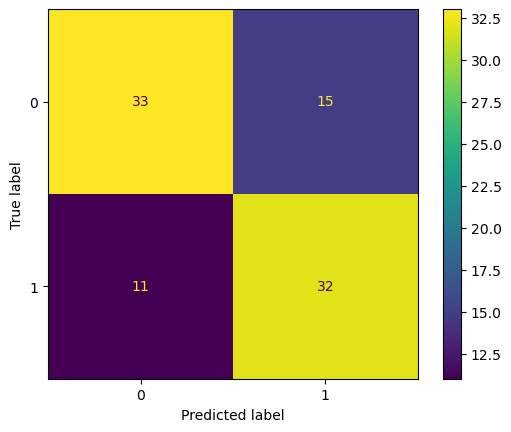

In [23]:
cm_dt=confusion_matrix(y_test,y_pred_dt)
disp_dt=ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.show()

In [24]:
cv_score_dt=cross_val_score(dt_model,X_train,y_train,cv=5)

In [25]:
cv_score_dt

array([0.6744186 , 0.65116279, 0.66666667, 0.61904762, 0.88095238])

([<matplotlib.axis.XTick at 0x152bd8f80>,
 [Text(0, 0, 'folds 1'),
  Text(1, 0, 'folds 2'),
  Text(2, 0, 'folds 3'),
  Text(3, 0, 'folds 4'),
  Text(4, 0, 'folds 5')])

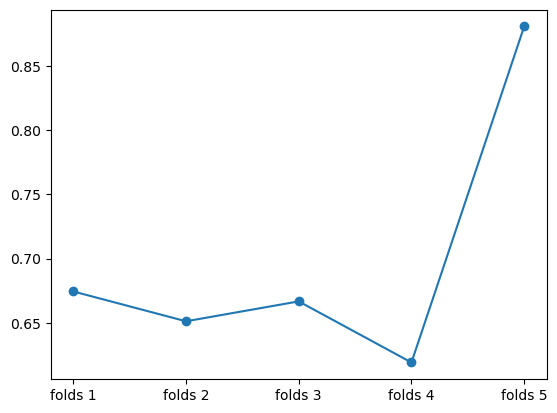

In [33]:
plt.plot(cv_score_dt,marker='o')
plt.xticks(ticks=range(len(cv_score_dt)),labels=[f'folds {i+1}' for i in range (len(cv_score_dt))])

In [34]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
feature_importance=rf_model.feature_importances_

In [36]:
importance_df=pd.DataFrame({'feature':X.columns,'Importance':feature_importance})

In [38]:
importance_df=importance_df.sort_values('Importance',ascending=False)

In [39]:
print("Feature Importance:\n", importance_df)

Feature Importance:
     feature  Importance
2        cp    0.131005
7   thalach    0.124980
11       ca    0.117825
12     thal    0.097707
0       age    0.089397
9   oldpeak    0.088713
3    restbp    0.081397
4      chol    0.078352
8     exang    0.073233
1       sex    0.047567
10    slope    0.043198
6   restecg    0.017804
5       fbs    0.008821


In [40]:
param_grid={
    'n_estimators':[50,100,200],
    'max_features':[5,10,15,None],
    'max_features':['sqrt','log2',None]
}

In [41]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END ................max_features=sqrt, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [42]:
best_rf_model=grid_search.best_estimator_

In [43]:
y_pred_best_rf = best_rf_model.predict(X_test)

In [44]:
best_params=grid_search.best_params_

In [45]:
n_estimator=best_params['n_estimators']

In [46]:
n_estimator

50